In [6]:
import sys
import pathlib
sys.path.append(pathlib.Path(__file__).parent.parent)
import config import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from uncertainty_metrics import *
from iteration_correction import *

In [7]:
# Generate uncertainty measurements of the model predictions and f score
image_list = os.listdir(path_prediction_features)
normalized_stds = np.zeros(len(image_list))
normalized_eµntropies = np.zeros(len(image_list))
normalized_binary_ratios = np.zeros(len(image_list))
images_f_scores = np.zeros(len(image_list))

for i, image in enumerate(image_list[:]):

    current_image_prediction_path = os.path.join(path_prediction_features, image, 'predictions.npy')
    current_image_trues_path = os.path.join(path_prediction_features, image, 'trues.npy')
    trues = np.load(current_image_trues_path)

    mc_predictions = np.squeeze(np.load(current_image_prediction_path))
    
    # STDs
    normalized_stds[i] = compute_std(mc_predictions,
                                     patch_level=False)
    # Entropy
    normalized_entropies[i] = compute_entropy(mc_predictions,
                                              patch_level=False)
    #F1 Scores
    f1 = metrics(np.mean(mc_predictions,0),trues)[3]
    images_f_scores[i] = f1

NameError: name 'normalized_entropies' is not defined

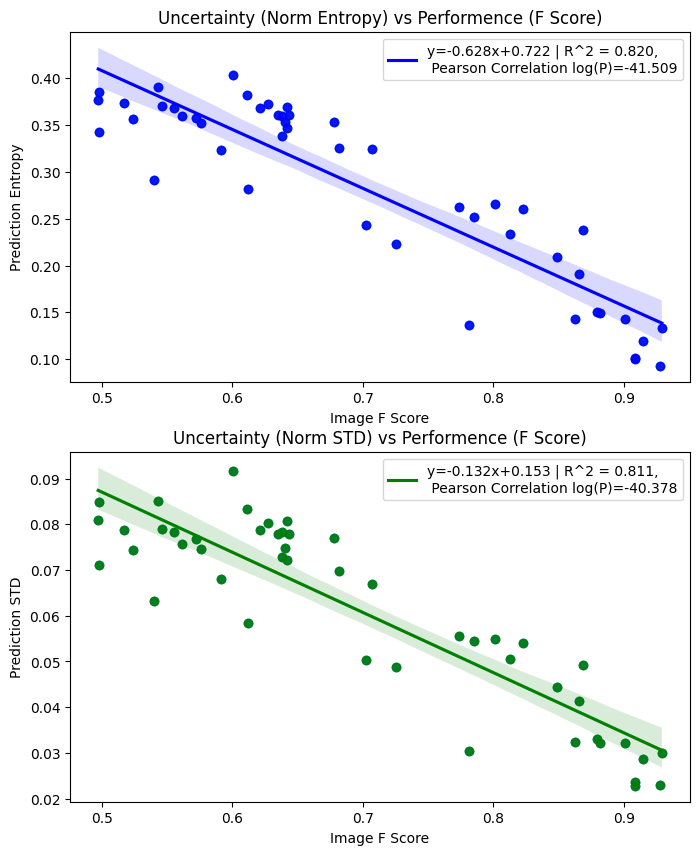

In [3]:
# plot the uncertainty as a function of the prediction quality
x1 = images_f_scores
y1 = normalized_entropies
y2 = normalized_stds
f, axs = plt.subplots(2, 1, figsize=(8,10))

plt.subplot(2, 1, 1)
plt.scatter(x1, y1)
plt.xlabel("Image F Score")
plt.ylabel("Prediction Entropy")
plt.title('Uncertainty (Norm Entropy) vs Performence (F Score)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
ax1 = sns.regplot(x1, y1, color='b', 
 line_kws={'label':"y={0:.3f}x+{1:.3f} | R^2 = {2:.3f},\n Pearson Correlation log(P)={3:.3f}".format(slope,intercept, r_value**2, np.log(p_value))}, )
ax1.legend()

plt.subplot(2, 1, 2)
plt.scatter(x1, y2)
plt.xlabel("Image F Score")
plt.ylabel("Prediction STD")
plt.title('Uncertainty (Norm STD) vs Performence (F Score)')
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x1,y2)
ax2 = sns.regplot(x1, y2, color='g', 
 line_kws={'label':"y={0:.3f}x+{1:.3f} | R^2 = {2:.3f},\n Pearson Correlation log(P)={3:.3f}".format(slope2,intercept2, r_value2**2, np.log(p_value2))}, )
plt.annotate("r-squared = ", xy=(0.5,0.5))
ax2.legend()

plt.show()